In [12]:
# Import the dependencies
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as sts
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [13]:
# Read the Pymaceutical_data.csv into a DataFrame
pymaceutical_data = pd.read_csv('../Resources/Pymaceutical_data.csv')
pymaceutical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,a457,0,45.0,0,Ketapril,Female,11,30
3,c819,0,45.0,0,Ketapril,Male,21,25
4,h246,0,45.0,0,Ketapril,Male,13,30


### Does drug treatment significantly reduce tumor volume? 

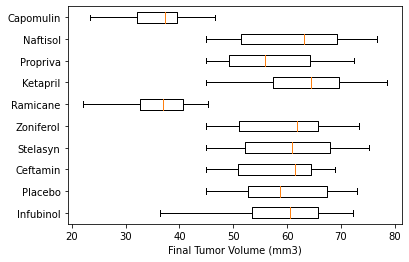

In [15]:
# Create a boxplot that compares the drug regimens and tumor volume. 
treatment_list = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']
tumor_vol_list = []
max_tumor = pymaceutical_data.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
merged_data = max_tumor.merge(pymaceutical_data, on=['Mouse ID', 'Timepoint'], how='left')
merged_data.head()

for drug in treatment_list:

    # Locate the rows which match the drug and get the final tumor volumes of all mice
    final_tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == drug]['Tumor Volume (mm3)']
        
    # Append the outcome to the empty list previously created.
    tumor_vol_list.append(final_tumor_vol)
red_circle = dict(markerfacecolor='r', marker='o')
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=red_circle, vert=False)
plt.xlabel('Final Tumor Volume (mm3)')
plt.show()

In [22]:
# Create individual data Series, one for each drug treatment that has the tumor volume for each mouse.
group1 = merged_data[merged_data["Drug Regimen"] == 'Infubinol']["Tumor Volume (mm3)"]
group2 = merged_data[merged_data["Drug Regimen"] == 'Placebo']["Tumor Volume (mm3)"]
group3 = merged_data[merged_data["Drug Regimen"] == 'Ceftamin']["Tumor Volume (mm3)"]
group4 = merged_data[merged_data["Drug Regimen"] == 'Stelasyn']["Tumor Volume (mm3)"]
group5 = merged_data[merged_data["Drug Regimen"] == 'Zoniferol']["Tumor Volume (mm3)"]
group6 = merged_data[merged_data["Drug Regimen"] == 'Ramicane']["Tumor Volume (mm3)"]
group7 = merged_data[merged_data["Drug Regimen"] == 'Ketapril']["Tumor Volume (mm3)"]
group8 = merged_data[merged_data["Drug Regimen"] == 'Propriva']["Tumor Volume (mm3)"]
group9 = merged_data[merged_data["Drug Regimen"] == 'Naftisol']["Tumor Volume (mm3)"]
group10 = merged_data[merged_data["Drug Regimen"] == 'Capomulin']["Tumor Volume (mm3)"]

In [24]:
# Perform the ANOVA
sts.f_oneway(group1, group2, group3, group4, group5,group6, group7, group8, group9, group10)


F_onewayResult(statistic=32.5435072855367, pvalue=8.80912808073447e-36)

In [29]:
# Run Pairwise Tukey HSD test.
tukey = pairwise_tukeyhsd(endog=merged_data["Tumor Volume (mm3)"],
                          groups=merged_data["Drug Regimen"],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
Capomulin  Ceftamin  22.2101  0.001  14.2456  30.1747   True
Capomulin Infubinol   22.313  0.001  14.4319  30.1942   True
Capomulin  Ketapril  27.1728  0.001  19.2083  35.1374   True
Capomulin  Naftisol  24.6918  0.001  16.6372  32.7463   True
Capomulin   Placebo  23.8779  0.001  15.9134  31.8425   True
Capomulin  Propriva  21.0268  0.001  12.8748  29.1788   True
Capomulin  Ramicane   0.4259    0.9  -7.4552   8.3071  False
Capomulin  Stelasyn  23.9584  0.001  15.9038  32.0129   True
Capomulin Zoniferol  23.2421  0.001  15.2775  31.2067   True
 Ceftamin Infubinol   0.1029    0.9  -7.7782   7.9841  False
 Ceftamin  Ketapril   4.9627 0.5909  -3.0019  12.9273  False
 Ceftamin  Naftisol   2.4817    0.9  -5.5729  10.5362  False
 Ceftamin   Placebo   1.6678    0.9  -6.2968   9.6324  False
 Ceftamin  Propriva  -1.

#### Which drug treatments significantly reduce tumor volume? Support your results from the statistical analysis.
#Ramicane and Capo Mulin. Based off boxplots those were the only 2 with significant lower means. They also were the only two with P values that were significant relative to the placebo

### At 45 days, which drug treatments are more effective at significantly reducing the number of metastic sites? 

In [38]:
# Create a new DataFrame with the last time point (45 days). 
treatment_list = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']
tumor_vol_list = []
Timepoint2 = pymaceutical_data.loc[pymaceutical_data['Timepoint'] == 45]

max_tumor2 = Timepoint2.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor2 = max_tumor.reset_index()
merged_data2 = max_tumor.merge(Timepoint2, on=['Mouse ID', 'Timepoint'], how='left')
merged_data2

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2.0,Infubinol,Female,20.0,23.0
1,a251,45,65.525743,1.0,Infubinol,Female,21.0,25.0
2,a262,45,70.717621,4.0,Placebo,Female,17.0,29.0
3,a275,45,62.999356,3.0,Ceftamin,Female,20.0,28.0
4,a366,30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
223,z435,10,NaN,NaN,NaN,NaN,NaN,NaN
224,z578,45,30.638696,0.0,Ramicane,Male,11.0,16.0
225,z581,45,62.754451,3.0,Infubinol,Female,24.0,25.0
226,z795,45,65.741070,3.0,Naftisol,Female,13.0,29.0


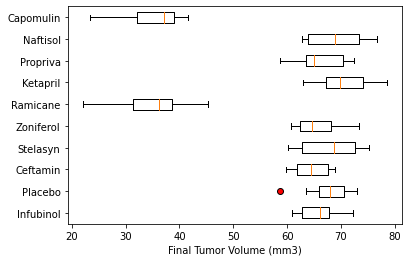

In [40]:
# Create a boxplot that compares the drug regimens and metastatic sites.
for drug in treatment_list:

    # Locate the rows which match the drug and get the final tumor volumes of all mice
    final_tumor_vol = Timepoint2.loc[Timepoint2['Drug Regimen'] == drug]['Tumor Volume (mm3)']
        
    # Append the outcome to the empty list previously created.
    tumor_vol_list.append(final_tumor_vol)
red_circle = dict(markerfacecolor='r', marker='o')
plt.boxplot(tumor_vol_list, labels = treatment_list, flierprops=red_circle, vert=False)
plt.xlabel('Final Tumor Volume (mm3)')
plt.show()

In [41]:
# Create individual data Series, one for each drug treatment that has the metastatic sites for each mouse.
group1 = Timepoint2[Timepoint2["Drug Regimen"] == 'Infubinol']["Tumor Volume (mm3)"]
group2 = Timepoint2[Timepoint2["Drug Regimen"] == 'Placebo']["Tumor Volume (mm3)"]
group3 = Timepoint2[Timepoint2["Drug Regimen"] == 'Ceftamin']["Tumor Volume (mm3)"]
group4 = Timepoint2[Timepoint2["Drug Regimen"] == 'Stelasyn']["Tumor Volume (mm3)"]
group5 = Timepoint2[Timepoint2["Drug Regimen"] == 'Zoniferol']["Tumor Volume (mm3)"]
group6 = Timepoint2[Timepoint2["Drug Regimen"] == 'Ramicane']["Tumor Volume (mm3)"]
group7 = Timepoint2[Timepoint2["Drug Regimen"] == 'Ketapril']["Tumor Volume (mm3)"]
group8 = Timepoint2[Timepoint2["Drug Regimen"] == 'Propriva']["Tumor Volume (mm3)"]
group9 = Timepoint2[Timepoint2["Drug Regimen"] == 'Naftisol']["Tumor Volume (mm3)"]
group10 = Timepoint2[Timepoint2["Drug Regimen"] == 'Capomulin']["Tumor Volume (mm3)"]

In [42]:
# Perform the ANOVA
sts.f_oneway(group1, group2, group3, group4, group5,group6, group7, group8, group9, group10)


F_onewayResult(statistic=134.38835452320976, pvalue=1.9191683806228624e-55)

In [45]:
# Run Pairwise Tukey HSD test.
tukey2 = pairwise_tukeyhsd(endog=Timepoint2["Tumor Volume (mm3)"],
                          groups=Timepoint2["Drug Regimen"],
                          alpha=0.05)
print(tukey2)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
Capomulin  Ceftamin  29.1013  0.001  23.5077  34.6948   True
Capomulin Infubinol  30.3585  0.001  24.2201   36.497   True
Capomulin  Ketapril  35.2659  0.001  29.5186  41.0132   True
Capomulin  Naftisol  33.3811  0.001  27.7876  38.9747   True
Capomulin   Placebo  32.1742  0.001  26.2476  38.1007   True
Capomulin  Propriva  30.8615  0.001  24.1543  37.5686   True
Capomulin  Ramicane  -0.1952    0.9  -5.1169   4.7265  False
Capomulin  Stelasyn  32.1726  0.001  26.0342  38.3111   True
Capomulin Zoniferol    30.36  0.001  24.8998  35.8201   True
 Ceftamin Infubinol   1.2573    0.9   -5.432   7.9465  False
 Ceftamin  Ketapril   6.1647 0.0634  -0.1675  12.4969  False
 Ceftamin  Naftisol   4.2799 0.4452  -1.9131  10.4729  False
 Ceftamin   Placebo   3.0729 0.8705  -3.4224   9.5682  False
 Ceftamin  Propriva   1.

#### Which drug treatments significantly reduce the number of metastatic sites? Support your results from the statistical analysis?


### Final Summary 



In [44]:
#Ramicane and Capomulin both held P values that were significant since P<0.01. They both had tumor volumes that were significant smaller from the placebo as can be seen by the boxplot. We also notice that the placebo had no noticeable different with any of other treat options. 